<a href="https://colab.research.google.com/github/aksha1234/akshay-/blob/master/python_random_forests_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('python-random-forests-assignment-v4')
jovian.set_colab_id('1F_8Vba9zwGFNWoZzZbZjEUKegP2TeXcA')

# House Prices - Advanced Regression Techniques

![](https://i.imgur.com/3sw1fY9.jpg)

In this assignment, you'll continue building on the previous assignment to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). 

We'll follow a step-by-step process:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end and your machine learning model is trained properly without errors. 




## How to Run the Code and Save Your Work

**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Let's begin by installing the required libraries.

In [ ]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

     |████████████████████████████████| 22.3MB 4.1MB/s 
     |████████████████████████████████| 20.6MB 105kB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.12.1 which is incompatible.


In [ ]:
!pip install pandas numpy matplotlib seaborn --quiet

## Download and prepare the dataset for training

In [ ]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']

In [ ]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = prices_df.columns[1:-1], prices_df.columns[-1]
inputs_df, targets = prices_df[input_cols].copy(), prices_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/akkikadwe/python-random-forests-assignment


'https://jovian.ai/akkikadwe/python-random-forests-assignment'

## Random Forests

<font size =3>**A random forest regressor.**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

![](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png)

In [14]:
from sklearn.ensemble import RandomForestRegressor

Let's define a helper function `random_forest_clr` which can test the given value of one or more hyperparameters.

In [18]:
# Create the model
## Model is created using the 100 no of tress for random classsifier as default 
def random_forest_clr(**param):
  model = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=50,**param).fit(train_inputs,train_targets)
  print(' The training model accuracy score is {:.4f} \n The validation model accuracy score is {:.4f} '.format(model.score(train_inputs,train_targets)*100,model.score(val_inputs,val_targets)*100))

In [19]:
random_forest_clr(max_depth=5)

 The training model accuracy score is 90.6790 
 The validation model accuracy score is 85.6567 


In [23]:
random_forest_clr(max_features=0.8)

 The training model accuracy score is 97.6235 
 The validation model accuracy score is 88.9231 


As it can be seen the  accuracy score between the training and validation set is comparable approx.5% and hence we can sat that the model is now overfit. So lets reduce the overfit by tuning the hyperparameter.

<font size =4> **Lets reduce the overfit using hyper-paramter tuning.**

## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

In [24]:
def test_random_forest_and_plot(param_name,param_values):
  train_error,val_error=[],[]
  for value in param_values:
    param={param_name:value}
    model=RandomForestRegressor(random_state=42,n_jobs=-1,**param).fit(train_inputs,train_targets)
    train_error.append(1-model.score(train_inputs,train_targets))
    val_error.append(1-model.score(val_inputs,val_targets))
  plt.figure(figsize=(12,9))
  plt.plot(param_values,train_error,'ro-')
  plt.plot(param_values,val_error,'bo-')
  plt.title(' The distribution of {} parameter'.format(param_name))
  plt.legend(['training','validation'])

<font size =4> 1. Max_Depth

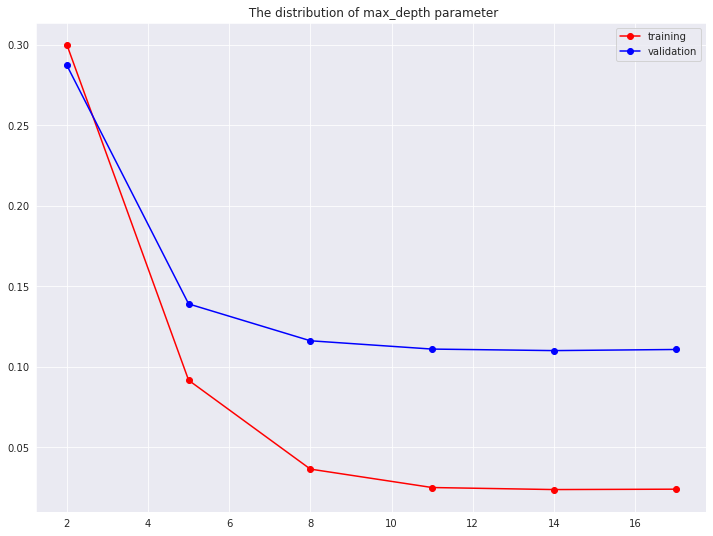

In [27]:
test_random_forest_and_plot('max_depth',np.arange(2,20,3))

Best value for max_depth is 14.

<font size =4> 2. n_estimators

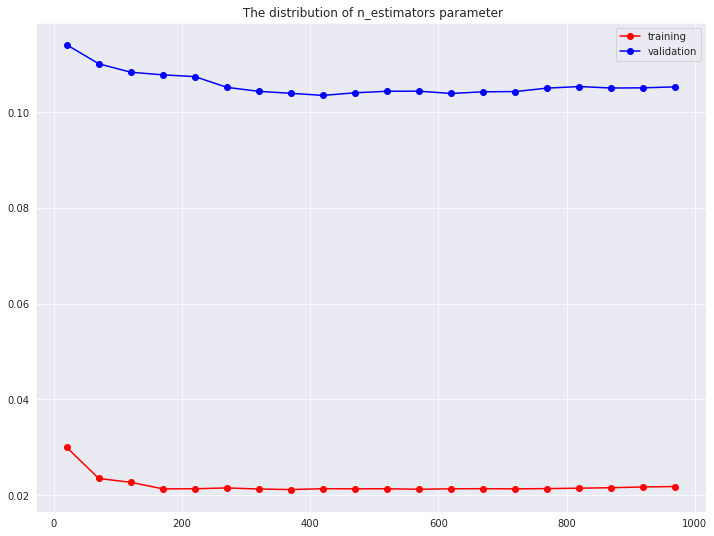

In [30]:
test_random_forest_and_plot('n_estimators',np.arange(20,1000,50))

Best value for n_estimators is 400.

<font size =4> 3. min_samples_leaf

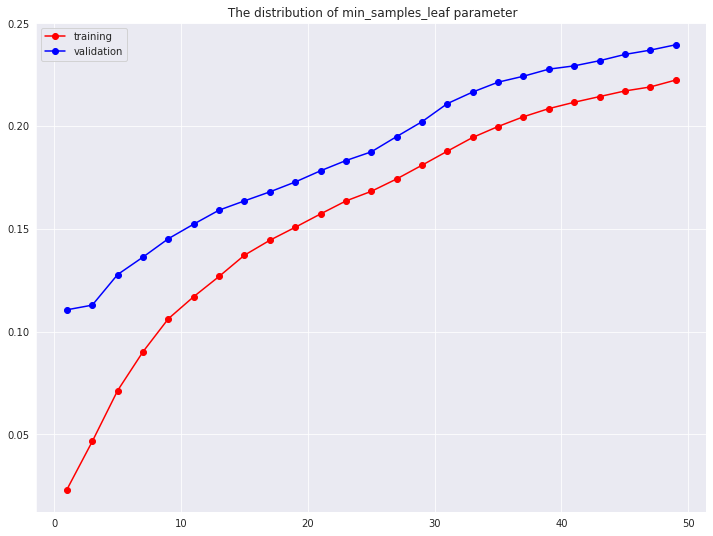

In [31]:
test_random_forest_and_plot('min_samples_leaf',np.arange(1,50,2))

<font size =4> 4. min_samples_split

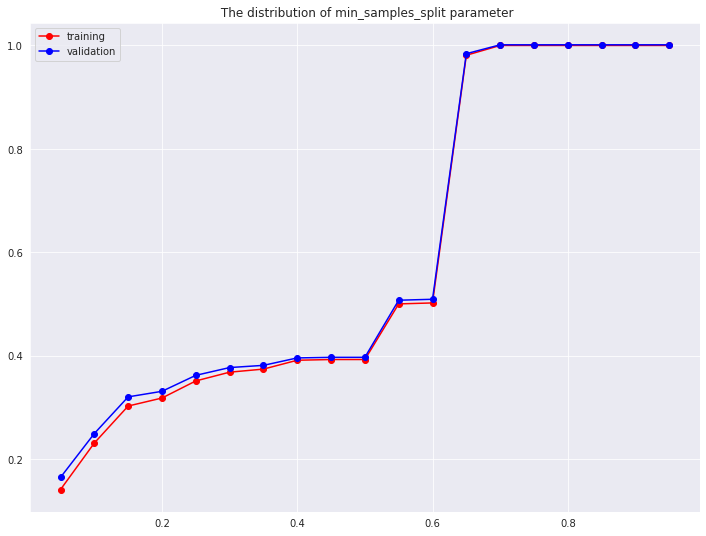

In [32]:
test_random_forest_and_plot('min_samples_split',np.arange(0.05,1,0.05))

<font size =4> 5. max_features

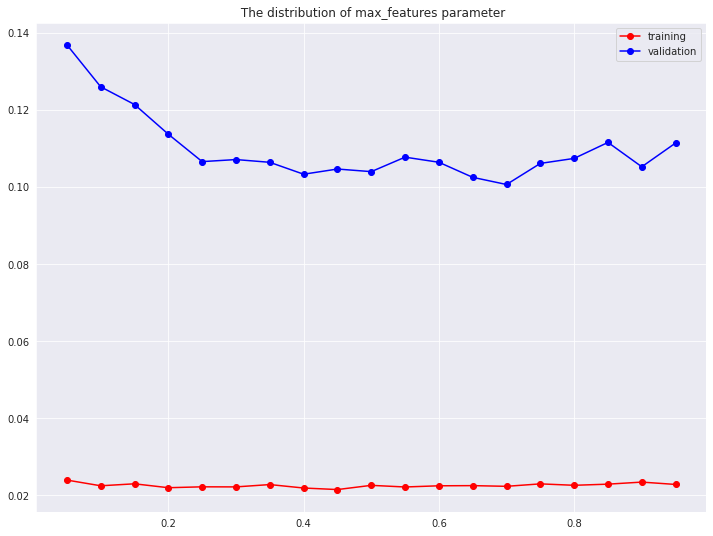

In [33]:
test_random_forest_and_plot('max_features',np.arange(0.05,1,0.05))

**The best value for max_features is 0.8.**

<font size =4> 6. max_leaf_nodes

CPU times: user 1min 53s, sys: 1.64 s, total: 1min 54s
Wall time: 1min 11s


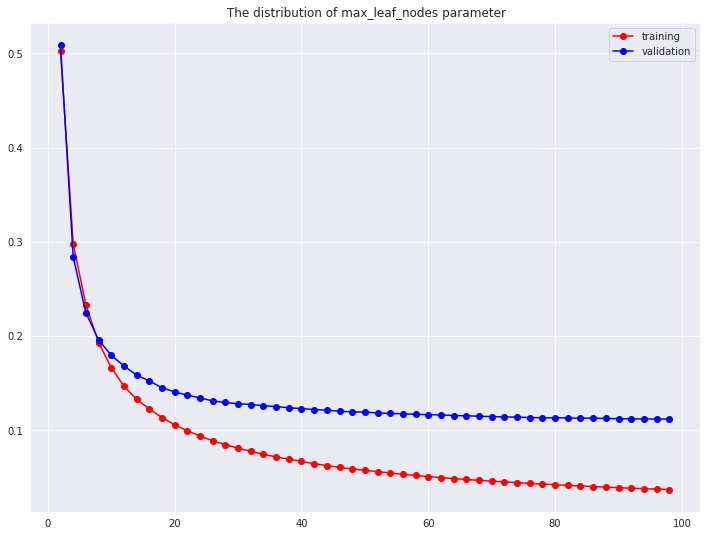

In [35]:
%%time
test_random_forest_and_plot('max_leaf_nodes',np.arange(2,100,2))

<font size =4> 7. max_samples

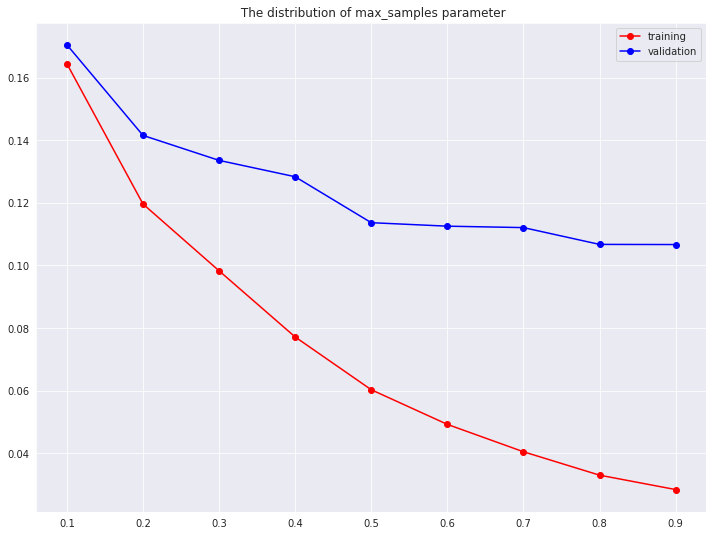

In [37]:
test_random_forest_and_plot('max_samples',np.arange(0.1,1,0.1))

**The best choice for max_samples is 0.8.**

### Lets build the model with the best hyper-parameter

1.max_depth = 14
2.n_estimators = 400
3.max_features = 0.8
4.max_samples = 0.8. 

In [44]:
random_forest_clr(max_depth=14,n_estimators=400,max_samples=0.8,max_features=0.8)

 The training model accuracy score is 96.8107 
 The validation model accuracy score is 89.6174 


<font size =4> Hence it can be seen the above best model is overfit by 7.4% however if we look at the accuracy score for the above model without using tuning it was max.88.9% but with tuning it is 89.62% which is a significant increment. 

## Lets check the random tree for best model 

In [45]:
model=RandomForestRegressor(n_jobs=-1,n_estimators=400,random_state=42,max_depth=14,max_samples=0.8,max_features=0.8).fit(train_inputs,train_targets)

In [46]:
model.estimators_[1]

DecisionTreeRegressor(max_depth=14, max_features=0.8, random_state=1273642419)

**Lets build the decision tree using graphviz and using 2nd tree estimators.**

In [47]:
from sklearn.tree import export_graphviz

In [49]:
import graphviz

In [48]:
figure=export_graphviz(model.estimators_[1],feature_names=numeric_cols+encoded_cols,filled=True,rounded=True)

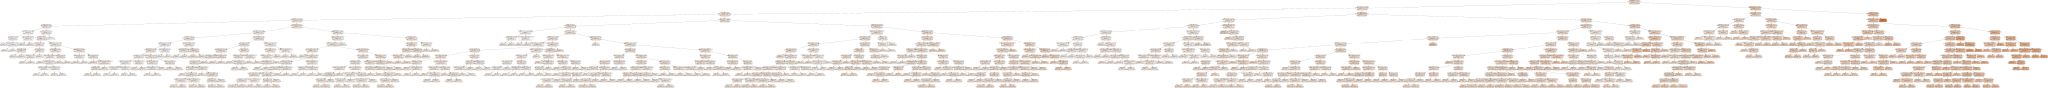

In [50]:
graphviz.Source(figure)

<font size =4>**Let's also view and plot the feature importances.**

In [51]:
feature_rf_imp = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

In [52]:
feature_rf_imp

,feature,importance
3,OverallQual,0.479292
15,GrLivArea,0.125243
25,GarageCars,0.046321
11,TotalBsmtSF,0.033652
13,2ndFlrSF,0.028951
8,BsmtFinSF1,0.027153
12,1stFlrSF,0.025911
5,YearBuilt,0.023279
26,GarageArea,0.017481
2,LotArea,0.016638


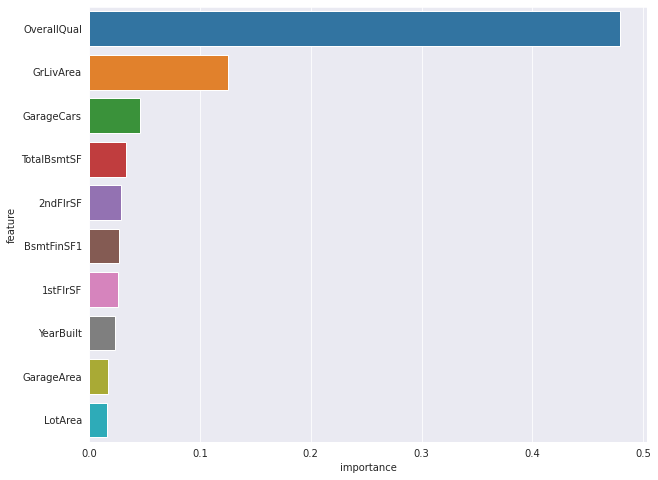

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(data=feature_rf_imp, x='importance', y='feature');

**Interpretation**

1. As intuited `OverallQual`(Overall material and finish quality) parameters influences the most in estimating the sales price of house .

2. `GrLivArea`(Above grade (ground) living area square feet) seems to be second most influential factor for sale price ,

3. Similarly `GarageCars`(Size of garage in car capacity) also play a critical role in slae price.

4. All the other remaining parametes also seems to have their slight part in sale price .

## KNN Neighbours

`sklearn.neighbors `provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either NumPy arrays or scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.

There are many learning routines which rely on nearest neighbors at their core. One example is kernel density estimation, discussed in the density estimation section.

![](https://bookdown.org/tpinto_home/Regression-and-Classification/_main_files/figure-html/knn3and20-1.png)

In [54]:
from sklearn.neighbors import KNeighborsRegressor

Let's define a helper function `knn_clr` which can test the given value of one or more hyperparameters.

In [57]:
# Create the model
## Model is created using the 100 no of tress for random classsifier as default 
def knn_clr(**param):
  model = KNeighborsRegressor(n_jobs=-1,**param).fit(train_inputs,train_targets)
  print(' The training model accuracy score is {:.4f} \n The validation model accuracy score is {:.4f} '.format(model.score(train_inputs,train_targets)*100,model.score(val_inputs,val_targets)*100))

n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs

In [58]:
knn_clr(n_neighbors=10)

 The training model accuracy score is 76.7932 
 The validation model accuracy score is 76.0277 


In [63]:
knn_clr(n_neighbors=11,algorithm='kd_tree')

 The training model accuracy score is 75.9851 
 The validation model accuracy score is 75.5261 


As it can be seen the  accuracy score between the training and validation set is comparable exactly and hence we can say that the model is no overfit. So lets increase the accuracy score by tuning the hyperparameter.

In [71]:
knn_clr(n_neighbors=18,algorithm='ball_tree',leaf_size=12)

 The training model accuracy score is 73.0819 
 The validation model accuracy score is 72.9033 


<font size =4> **Lets increase the accuracy score using hyper-paramter tuning.**

In [73]:
def test_knn_and_plot(param_name,param_values):
  train_error,val_error=[],[]
  for value in param_values:
    param={param_name:value}
    model=KNeighborsRegressor(n_jobs=-1,**param).fit(train_inputs,train_targets)
    train_error.append(1-model.score(train_inputs,train_targets))
    val_error.append(1-model.score(val_inputs,val_targets))
  plt.figure(figsize=(12,9))
  plt.plot(param_values,train_error,'ro-')
  plt.plot(param_values,val_error,'bo-')
  plt.title(' The distribution of {} parameter'.format(param_name))
  plt.legend(['training','validation'])

### 1. n_neighbors

CPU times: user 3.05 s, sys: 3.72 s, total: 6.78 s
Wall time: 4.79 s


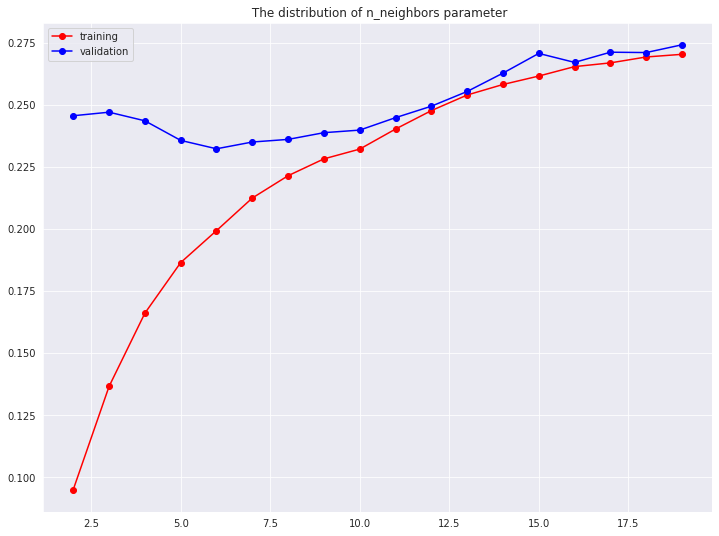

In [75]:
%%time
test_knn_and_plot('n_neighbors',np.arange(2,20,1))

**The bets option for n_neighbors is 5.8.**

### 1. leaf_size

CPU times: user 8.2 s, sys: 10.2 s, total: 18.4 s
Wall time: 13 s


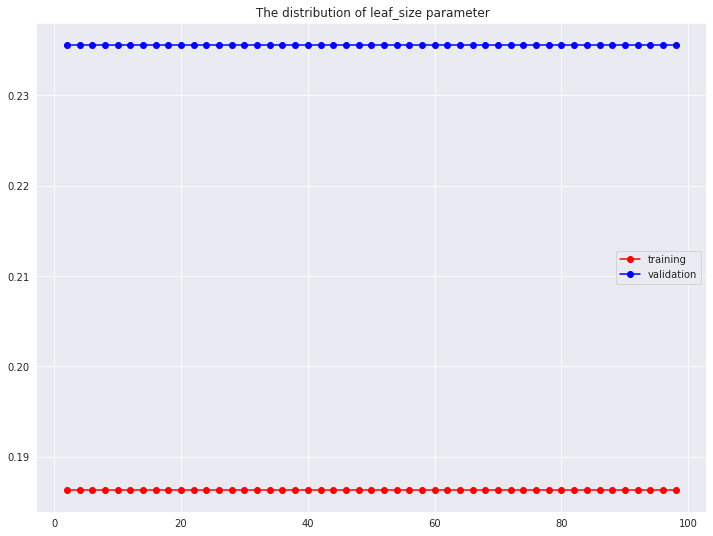

In [76]:
%%time
test_knn_and_plot('leaf_size',np.arange(2,100,2))

### The best parameter for KNNEighbors is 
- n_neighbors=5.8

### Model for best parameter using KNNeighbors

In [80]:
knn_clr(n_neighbors=6)

 The training model accuracy score is 80.0777 
 The validation model accuracy score is 76.7803 


### **Conclusion**: Hence it can be seen that the accuracy score for this KNNeighbor model is less than the Random forest as there randomisation of decsision tress with hyperparamter is happening hence reduces the overfit largely and teh result can also be seen in the result. 

In [81]:
model=KNeighborsRegressor(n_neighbors=6,n_jobs=-1).fit(train_inputs,train_targets)

In [86]:
model.n_features_in_

304

## XGBoost

<font size =3>**XGBOOST.**

The results of the regression problems are continuous or real values. Some commonly used regression algorithms are Linear Regression and Decision Trees. There are several metrics involved in regression like root-mean-squared error (RMSE) and mean-squared-error (MAE). These are some key members for XGBoost models, each plays their important roles.

RMSE: It is the square root of mean squared error (MSE).
MAE: It is an absolute sum of actual and predicted differences, but it lacks mathematically, that’s why it is rarely used, as compared to other metrics.
XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners.

The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics.

Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

![](https://cdn-images-1.medium.com/max/1000/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg)

In [87]:
from xgboost import XGBRegressor

In [88]:
from sklearn.metrics import confusion_matrix,classification_report

In [90]:
## Lets define the helper model model 
def xgboost_clfr(**param):
  model=XGBRegressor(n_jobs=-1,random_state=42,**param).fit(train_inputs,train_targets)
  print(' The training model accuracy score is {:.4f} \n The validation model accuracy score is {:.4f} '.format(model.score(train_inputs,train_targets)*100,model.score(val_inputs,val_targets)*100))


In [91]:
xgboost_clfr(max_depth=6)

[18:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 The training model accuracy score is 99.4985 
 The validation model accuracy score is 88.4041 


**As it can be seen the XGBoost Regresor is very fast in computing the prediction and also the accuracy score is high.**

In [95]:
xgboost_clfr(n_estimators=200,max_depth=5)

[18:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 The training model accuracy score is 99.6480 
 The validation model accuracy score is 88.5396 


In [96]:
def test_xgboost_and_plot(param_name,param_values):
  train_error,val_error=[],[]
  for value in param_values:
    param={param_name:value}
    model=XGBRegressor(random_state=42,n_jobs=-1,**param).fit(train_inputs,train_targets)
    train_error.append(1-model.score(train_inputs,train_targets))
    val_error.append(1-model.score(val_inputs,val_targets))
  plt.figure(figsize=(12,9))
  plt.plot(param_values,train_error,'ro-')
  plt.plot(param_values,val_error,'bo-')
  plt.title(' The distribution of {} parameter'.format(param_name))
  plt.legend(['training','validation'])

<font size =4> 1. Max_Depth

[18:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


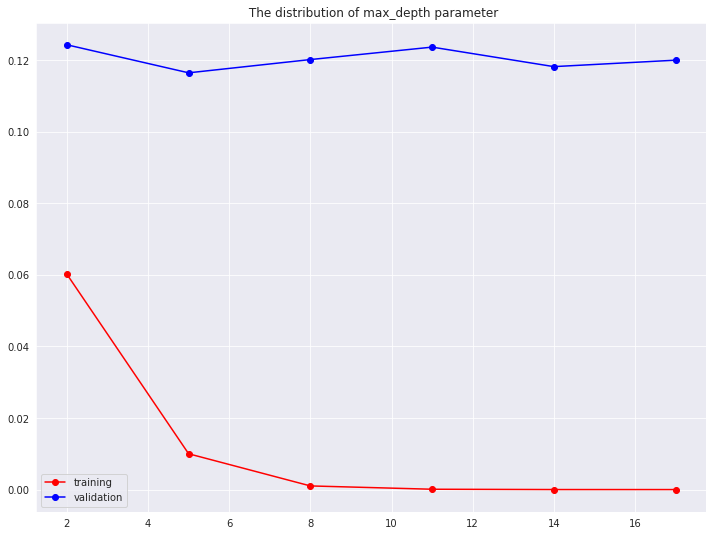

In [97]:
test_xgboost_and_plot('max_depth',np.arange(2,20,3))

**The best option for max_depth = 5.**

<font size =4> 2. learning_rate

[18:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

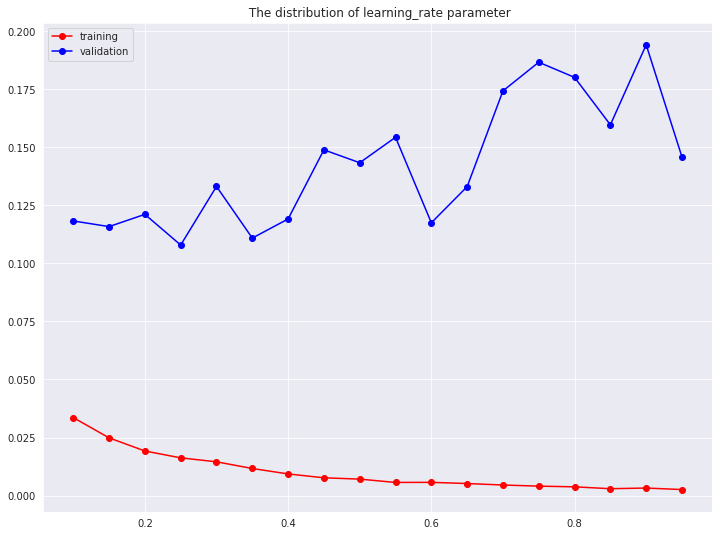

In [99]:
test_xgboost_and_plot('learning_rate',np.arange(0.1,1,0.05))

**The best option for learning_rate is 0.25.**

<font size =4> 3. n_estimators

[18:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

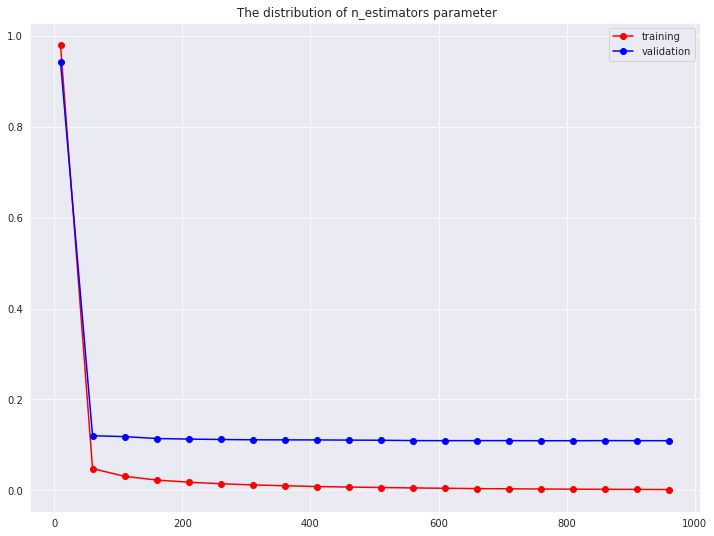

In [100]:
test_xgboost_and_plot('n_estimators',np.arange(10,1000,50))

<font size =4> 4. subsample

[18:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

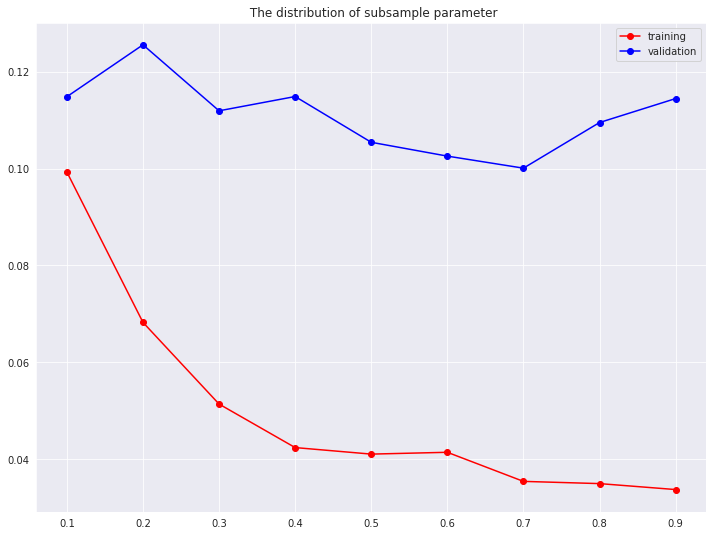

In [101]:
test_xgboost_and_plot('subsample',np.arange(0.1,1,0.1))

**The best option for subsample is 0.7.**

[18:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

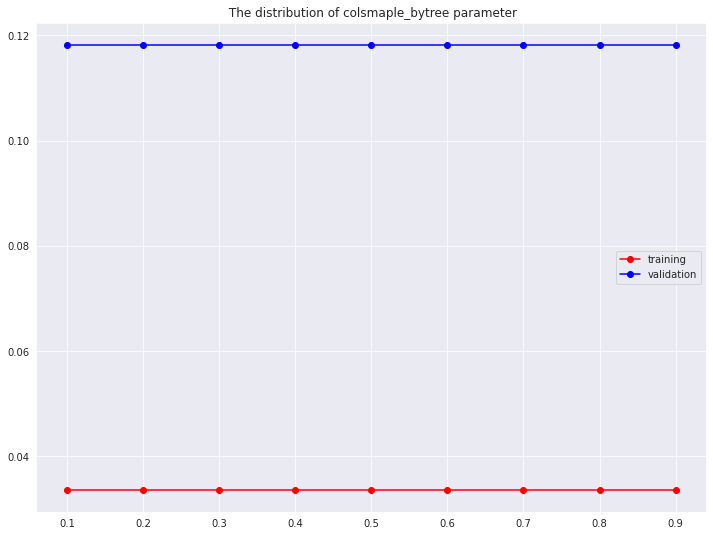

In [102]:
test_xgboost_and_plot('colsmaple_bytree',np.arange(0.1,1,0.1))

### Lets model with XGBOOST model using best hyper-parameter as
- max_depth =5
- learning_rate =0.25
- subsample=0.7 

In [103]:
xgboost_clfr(max_depth=5,learning_rate=0.25,subsample=0.7)

[18:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 The training model accuracy score is 99.7974 
 The validation model accuracy score is 87.9516 


## Lets submit the submission using XGBoost model 

In [104]:
model=XGBRegressor(n_jobs=-1,random_state=42,max_depth=5,learning_rate=0.25,subsample=0.7).fit(train_inputs,train_targets)

[18:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [105]:
pred_xgb_train=model.predict(train_inputs)
pred_xgb_val=model.predict(val_inputs)

### Lets chart the top 10 most important features in the model

In [108]:
xgb_feature=pd.DataFrame({'feature':numeric_cols+encoded_cols,'importance':model.feature_importances_}).sort_values('importance',ascending=False).head(10)

In [112]:
xgb_feature

,feature,importance
3,OverallQual,0.205919
25,GarageCars,0.163575
172,ExterQual_TA,0.089770
18,FullBath,0.049586
15,GrLivArea,0.034500
235,KitchenQual_TA,0.030922
40,MSZoning_RM,0.021999
21,KitchenAbvGr,0.019991
295,SaleType_New,0.018366
232,KitchenQual_Ex,0.017638


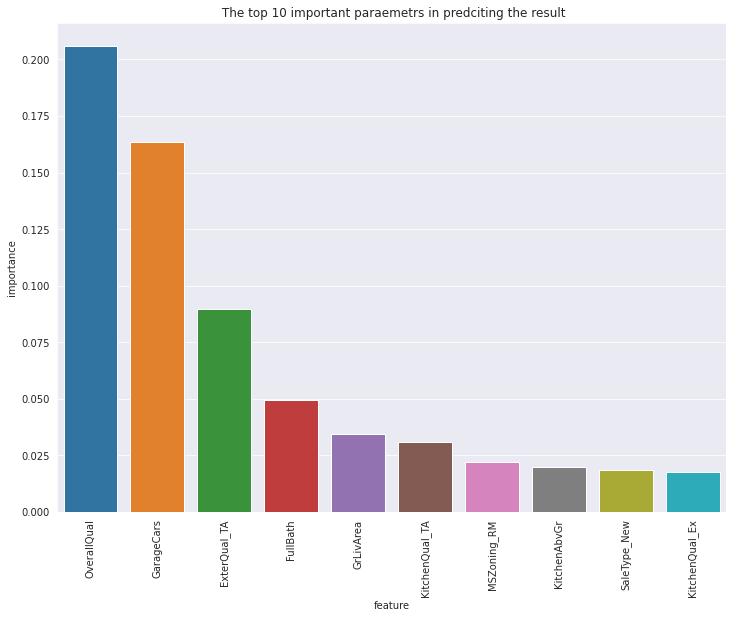

In [116]:
plt.figure(figsize=(12,9))
sns.barplot(data=xgb_feature,x='feature',y='importance')
plt.title(' The top 10 important paraemetrs in predciting the result')
plt.xticks(rotation=90);

## Lets use the LIGHT GBM

In [138]:
from lightgbm import LGBMRegressor

In [141]:
%%time
def light_gbm_clfr(**param):
  model=LGBMRegressor(n_jobs=-1,random_state=42,**param).fit(train_inputs,train_targets)
  print(' the training model score is {:.4f}% and \ The validatin score is {:.4f}%'.format(model.score(train_inputs,train_targets)*100,model.score(val_inputs,val_targets)*100))

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 15.5 µs


In [142]:
%%time
light_gbm_clfr(n_estimators=200)

 the training model score is 99.3525% and \ The validatin score is 89.5927%
CPU times: user 1.17 s, sys: 47.1 ms, total: 1.22 s
Wall time: 658 ms


In [146]:
light_gbm_clfr(max_depth=8)

 the training model score is 97.3642% and \ The validatin score is 89.0676%


### As it can be seen that that teh accuracy score of the lightGBM modle is 89.06% however for XGBoost model is 87.96% which is a significant increase in the score.

### Lets tune the hyper-parameter

In [147]:
def test_lightgbm_and_plot(param_name,param_values):
  train_error,val_error=[],[]
  for value in param_values:
    param={param_name:value}
    model=LGBMRegressor(random_state=42,n_jobs=-1,**param).fit(train_inputs,train_targets)
    train_error.append(1-model.score(train_inputs,train_targets))
    val_error.append(1-model.score(val_inputs,val_targets))
  plt.figure(figsize=(12,9))
  plt.plot(param_values,train_error,'ro-')
  plt.plot(param_values,val_error,'bo-')
  plt.title(' The distribution of {} parameter'.format(param_name))
  plt.legend(['training','validation'])

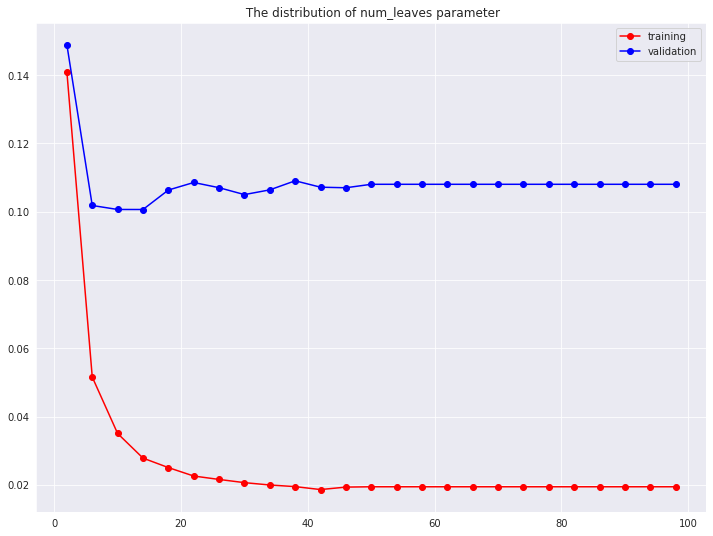

In [148]:
##1. num_leaves
test_lightgbm_and_plot('num_leaves',np.arange(2,100,4))

**The best option for num_leaves is 10.**

CPU times: user 6.65 s, sys: 185 ms, total: 6.83 s
Wall time: 3.66 s


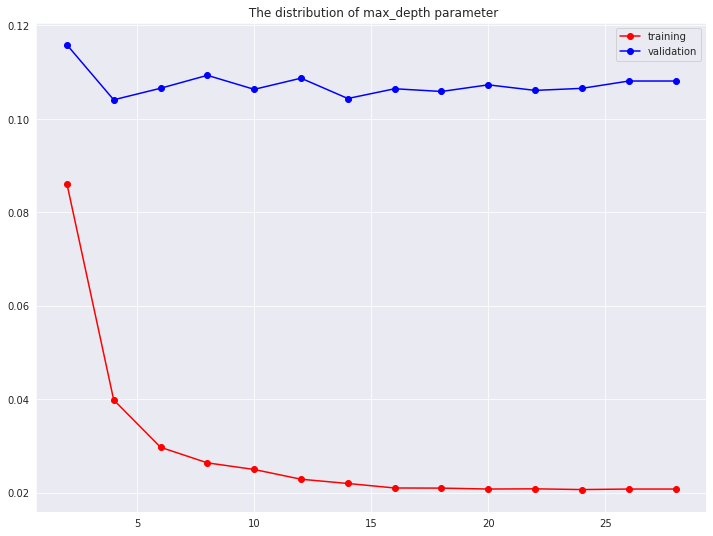

In [151]:
%%time
test_lightgbm_and_plot('max_depth',np.arange(2,30,2))

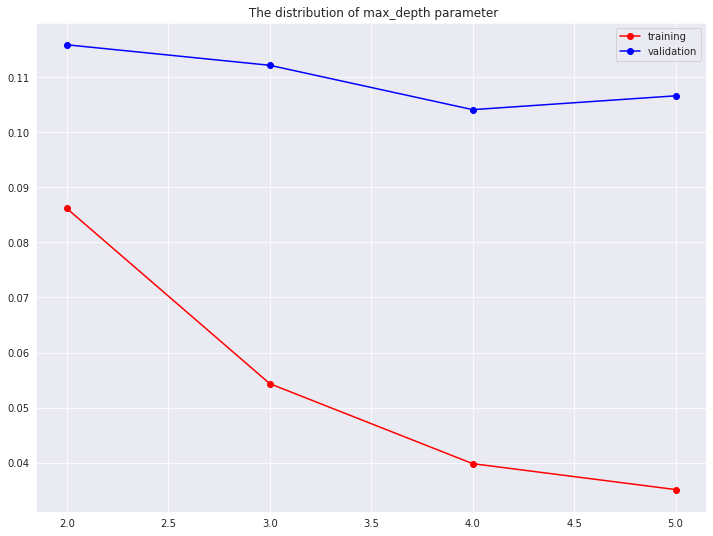

In [150]:
test_lightgbm_and_plot('max_depth',np.arange(2,6,1))

**The best option for max_depth is 4.**

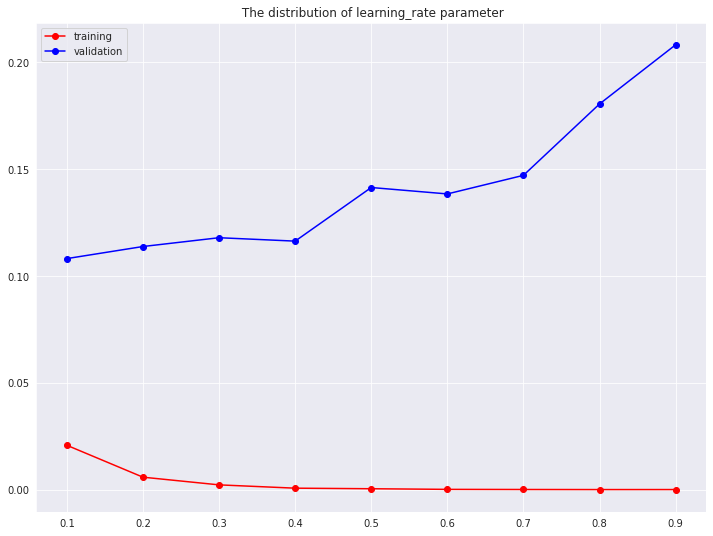

In [152]:
test_lightgbm_and_plot('learning_rate',np.arange(0.1,1,0.1))

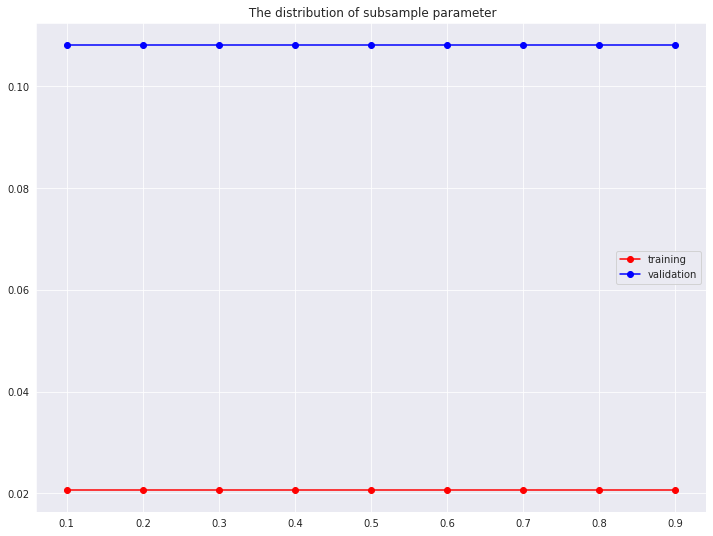

In [153]:
test_lightgbm_and_plot('subsample',np.arange(0.1,1,0.1))

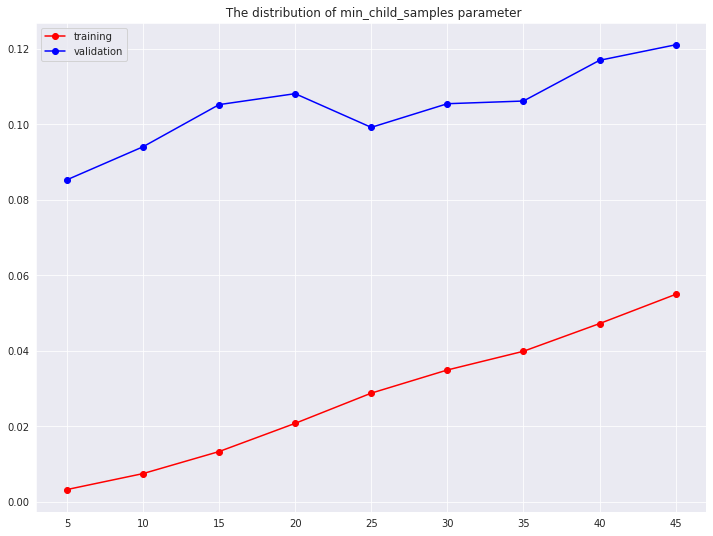

In [154]:
test_lightgbm_and_plot('min_child_samples',np.arange(5,50,5))

In [155]:
model_lightgbm=LGBMRegressor(num_leaves=10,max_depth=4,random_state=42,n_jobs=-1).fit(train_inputs,train_targets)

boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs

In [110]:
?sns.barplot

## Make a Submission

To make a submission, just execute the following cell:

## Making Predictions on the Test Set

Let's make predictions on the test set provided with the data.

In [117]:
test_df = pd.read_csv('house-prices/test.csv')

In [118]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

First, we need to reapply all the preprocessing steps.

In [119]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [120]:
test_inputs = test_df[numeric_cols + encoded_cols]

We can now make predictions using our final model.

In [156]:
test_preds = model_lightgbm.predict(test_inputs)

In [157]:
submission_df = pd.read_csv('house-prices/sample_submission.csv')

In [158]:
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Let's replace the values of the `SalePrice` column with our predictions.

In [159]:
submission_df['SalePrice'] = test_preds

Let's save it as a CSV file and download it.

In [160]:
submission_df.to_csv('submission_lightgbm.csv', index=False)

In [126]:
from IPython.display import FileLink
FileLink('submission6.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/content/submission6.csv

We can now submit this file to the competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions

![](https://i.imgur.com/6h2vXRq.png)


### Making Predictions on Single Inputs

In [127]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [128]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [129]:
predicted_price = predict_input(model, sample_input)

In [130]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $125325.9765625


> **EXERCISE**: Change the sample input above and make predictions. Try different examples and try to figure out which columns have a big impact on the sale price. Hint: Look at the feature importance to decide which columns to try.

### Saving the Model

In [161]:
import joblib

In [162]:
house_prices_rf = {
    'model_lightgbm': model_lightgbm,
    'model_xgboost':model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [163]:
joblib.dump(house_prices_rf, 'house_prices_rf.joblib')

['house_prices_rf.joblib']

Let's save our work before continuing.

In [165]:
jovian.commit(project='House-Prices-Advanced-Regression-Techniques',outputs=['house_prices_rf.joblib'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/akkikadwe/house-prices-advanced-regression-techniques


'https://jovian.ai/akkikadwe/house-prices-advanced-regression-techniques'